## workflow of tensors 

In [7]:
import torch 
from torch import nn # nn contains the all of the pytorch's building blocks for the neural networks 
import matplotlib.pyplot as plt 

torch.__version__

'2.1.1+cpu'

In [8]:
#creating known parameters 
weight = 0.7 
bias = 0.3

start = 0 
end = 1 
step = 0.02 

X = torch.arange(start , end , step).unsqueeze(dim=1)
y = weight*X + bias
X , y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [9]:
len(X) , len(y)

(50, 50)

### splitting the data into test and train to train our model and test it 

In [10]:
# using the ratio of 80-20 % 
train_split = int(0.8* len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

In [11]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

In [12]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(x=train_data, y=train_labels, c="b", label="TRAINING DATA")
    plt.scatter(x=test_data, y=test_labels, c="r", label="TEST DATA")
    if predictions is not None:
        plt.scatter(x=test_data, y=predictions, c="g", label="PREDICTIONS")  # Corrected x to be test_data
    plt.legend()
    plt.title("SCATTER PLOT OF TRAIN, TEST AND PREDICTED DATA")
    plt.show()


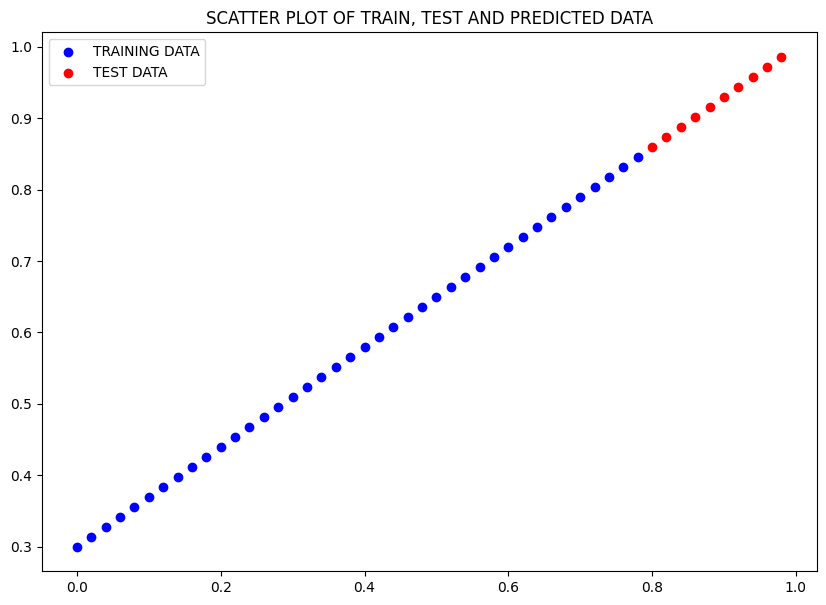

In [13]:
plot_predictions()

## MAKING FIRST LINEAR MODEL USING PYTORCH 

what will our model do :
1. start with random values (for weights and bias )
2. adjust those random values of the weights and bias by looking at the training data to get much more closer to the ideal values 

** HOW DOES IT DO IT ?**
1. through gradient descent 
2. back propogation 


In [14]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):  # almost everything in pytorch inherits from the nn.Module class, also the base class for all the modules
    def __init__(self):
        super().__init__()  # Corrected the super call
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    # forward method to define the computation in the model 
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # Corrected indentation
        return self.weights * x + self.bias
    # forward method should always be there in the nn.Module, it defines the computation to be performed at each call


## PYTORCH MODEL BUILDING ESSENTIALS 
* torch.nn - contains all the buildings for the computational graphs ( a neural network )
* torch.nn.parameter - what parameter our model should try and learn 
* torch.nn.Module - its a base class for all the neural network modules , if you subclass it , you should also include forward method in it 
* torch.optim - this where the optimizers in ptorch live , and they will help with gradient descent 
* def forward() - all nn.Module subclasses require you to override the forward() method , this method defines what happens in the forward computations 


In [17]:
#create a manual random seed 
model_0 = LinearRegressionModel()

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.2523], requires_grad=True),
 Parameter containing:
 tensor([-1.7737], requires_grad=True)]

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2523])), ('bias', tensor([-1.7737]))])

In [21]:
weight, bias

(0.7, 0.3)

### making predictions using `torch.inference_mode()`  
to check our models predictive power , lets see how well it predicts our y test on the basis of x test 
when we pass the data through our model , its going to run it through the `forward` method 

In [22]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[-1.5719],
        [-1.5668],
        [-1.5618],
        [-1.5567],
        [-1.5517],
        [-1.5467],
        [-1.5416],
        [-1.5366],
        [-1.5315],
        [-1.5265]])

In [23]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

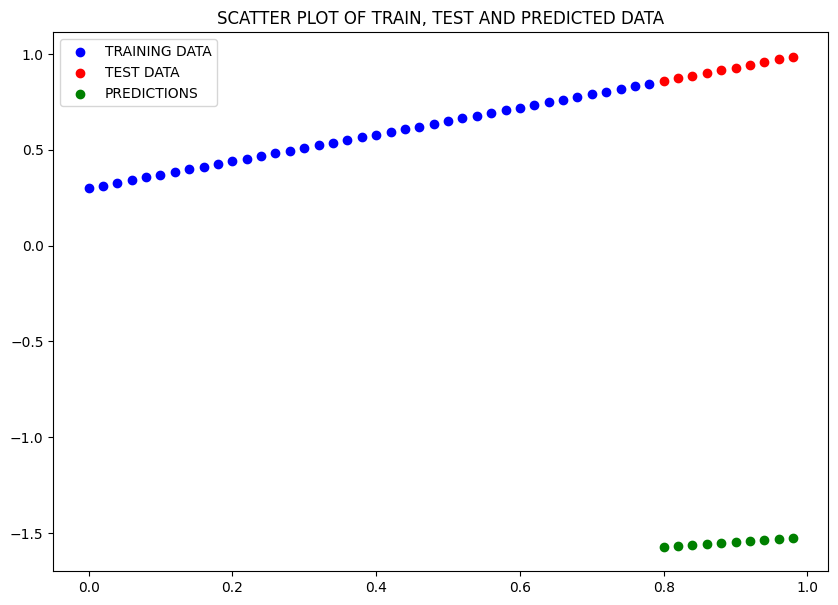

In [24]:
plot_predictions(predictions=y_preds)

In [25]:
# we can also do something similar to the above thing with torch.no_grad() , however , torch.inference_mdoe() is usually more preferred 
with torch.no_grad():
    y_pred_no_grad = model_0(X_test)

y_pred_no_grad

tensor([[-1.5719],
        [-1.5668],
        [-1.5618],
        [-1.5567],
        [-1.5517],
        [-1.5467],
        [-1.5416],
        [-1.5366],
        [-1.5315],
        [-1.5265]])

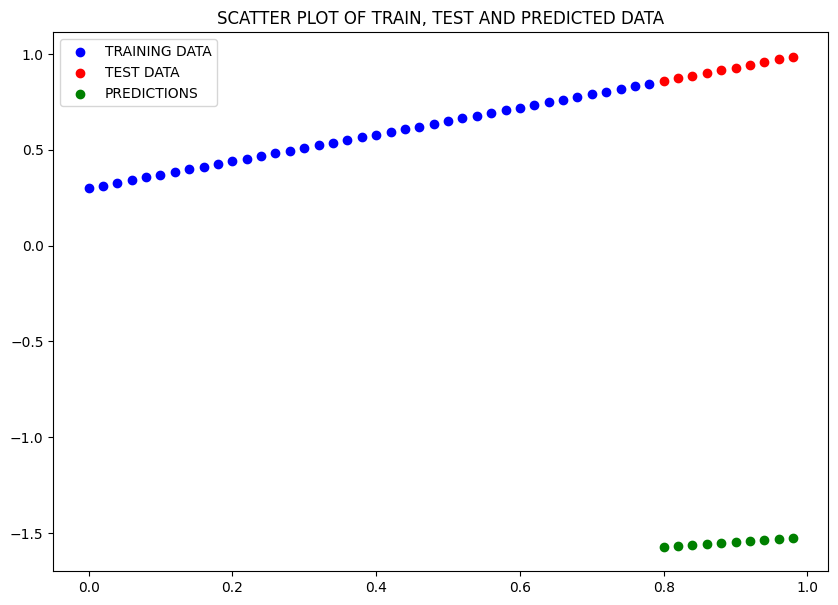

In [26]:
plot_predictions(predictions=y_pred_no_grad)

## training our model 
the whole idea of training is to move our parameters from some `unknown` parameters to some `known` parameters 

 *note* , the loss function can also be called as the cost function in some area or criterions 
 things we need in our model 
 * *LOSS FUNCTION* : a function to measure how bad our model's predictions are as compared to the test dataset 
 * *OPTIMISER* : takes into account the loss of the model and adjusts the model parameters 

and specifically , for pytorch we need a training loop and a testing loop 

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2523])), ('bias', tensor([-1.7737]))])

In [28]:
# setup a loss function 
loss_fn = nn.L1Loss()
learn_rate = 0.01
# setup an optimiser 
optimiser = torch.optim.SGD(params=model_0.parameters() , lr=learn_rate)  # stochiastic gradient descent 


### BUILDING A TRAINING LOOP IN PYTHON 
things we need in a training loop :
1. loop through the data
2. forward pass (this involves moving data through the forward method) - also called a forward propogation 
3. calculate the loss , and compare the forward pass predictions to ground truth labels 
4. optimisers zeor grad
5. loss backwards (*BACK PROPOGATION*)
6. optimiser step - use the optimiser to adjust the parameters to try and minimise our loss (*GRAIDENT DESCENT*)

In [29]:
epochs = 10
for epoch in range(epochs):
    model_0.train()  # Set model to training mode

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients
    optimiser.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimizer step
    optimiser.step()

    # Print loss every 1000 epochs
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}")

Epoch [1/10], Loss: 2.2483150959014893
Epoch [2/10], Loss: 2.2367939949035645
Epoch [3/10], Loss: 2.2252731323242188
Epoch [4/10], Loss: 2.213752031326294
Epoch [5/10], Loss: 2.202230930328369
Epoch [6/10], Loss: 2.1907100677490234
Epoch [7/10], Loss: 2.1791892051696777
Epoch [8/10], Loss: 2.167668104171753
Epoch [9/10], Loss: 2.156147003173828
Epoch [10/10], Loss: 2.1446261405944824


In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2913])), ('bias', tensor([-1.6737]))])

In [31]:
weight , bias

(0.7, 0.3)

In [32]:
preds = model_0(X_test)

In [33]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [34]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[-1.4407],
        [-1.4349],
        [-1.4290],
        [-1.4232],
        [-1.4174],
        [-1.4116],
        [-1.4057],
        [-1.3999],
        [-1.3941],
        [-1.3883]])

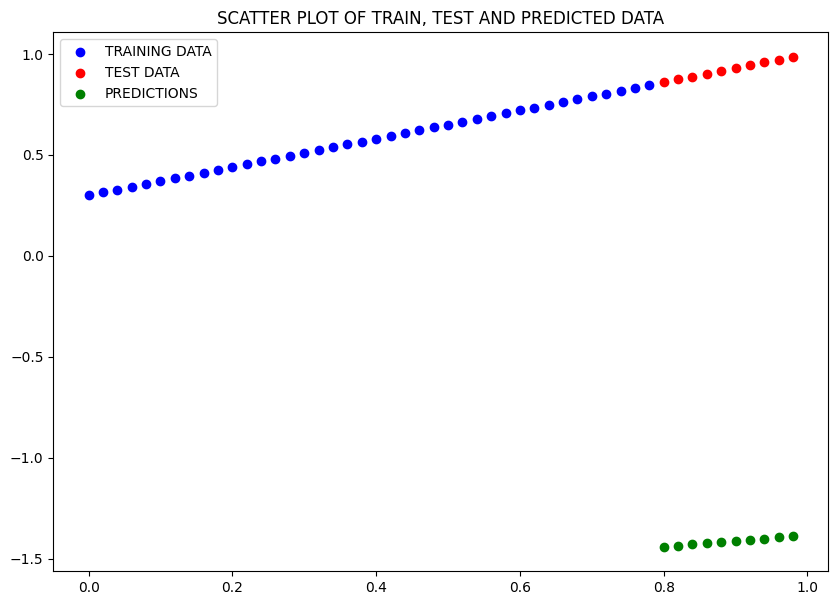

In [35]:
plot_predictions(predictions=y_preds)

[Parameter containing:
tensor([-1.2598], requires_grad=True), Parameter containing:
tensor([0.1452], requires_grad=True)]
OrderedDict([('weights', tensor([-1.2598])), ('bias', tensor([0.1452]))])


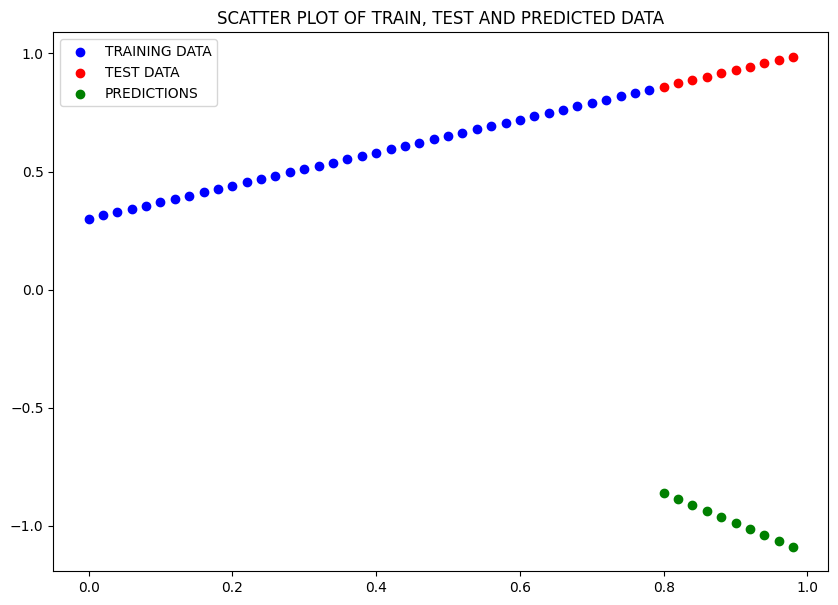

In [36]:
model_0 = LinearRegressionModel()

# Check model parameters
print(list(model_0.parameters()))
print(model_0.state_dict())

# Predict with torch.inference_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)


In [37]:
# Setup a loss function and optimizer
model_0 = LinearRegressionModel()
loss_fn = nn.L1Loss()
learning_rate = 0.001  # Reduced learning rate
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=learning_rate)
epoch_count = []
loss_values=[]
test_loss_value = []

# Training loop
epochs = 10000 # Increased number of epochs
for epoch in range(epochs):
    model_0.train()  # Set model to training mode

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    #6. model evaluation 
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred , y_test)
    # Print loss every 100 epochs
    if (epoch + 1) % 500 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_value.append(test_loss)
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()} , STATE DICTS : {model_0.state_dict()}")


Epoch [500/10000], Loss: 0.2134343832731247 , STATE DICTS : OrderedDict([('weights', tensor([0.1000])), ('bias', tensor([0.3232]))])
Epoch [1000/10000], Loss: 0.09123099595308304 , STATE DICTS : OrderedDict([('weights', tensor([0.2440])), ('bias', tensor([0.4762]))])
Epoch [1500/10000], Loss: 0.07342789322137833 , STATE DICTS : OrderedDict([('weights', tensor([0.3349])), ('bias', tensor([0.4533]))])
Epoch [2000/10000], Loss: 0.05625656992197037 , STATE DICTS : OrderedDict([('weights', tensor([0.4203])), ('bias', tensor([0.4175]))])
Epoch [2500/10000], Loss: 0.03908506780862808 , STATE DICTS : OrderedDict([('weights', tensor([0.5057])), ('bias', tensor([0.3816]))])
Epoch [3000/10000], Loss: 0.021912196651101112 , STATE DICTS : OrderedDict([('weights', tensor([0.5912])), ('bias', tensor([0.3457]))])
Epoch [3500/10000], Loss: 0.004739329218864441 , STATE DICTS : OrderedDict([('weights', tensor([0.6766])), ('bias', tensor([0.3098]))])
Epoch [4000/10000], Loss: 0.00031700581894256175 , STAT

In [38]:
print(test_loss_value)

[tensor(0.5107), tensor(0.2296), tensor(0.1716), tensor(0.1315), tensor(0.0913), tensor(0.0512), tensor(0.0110), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0008)]


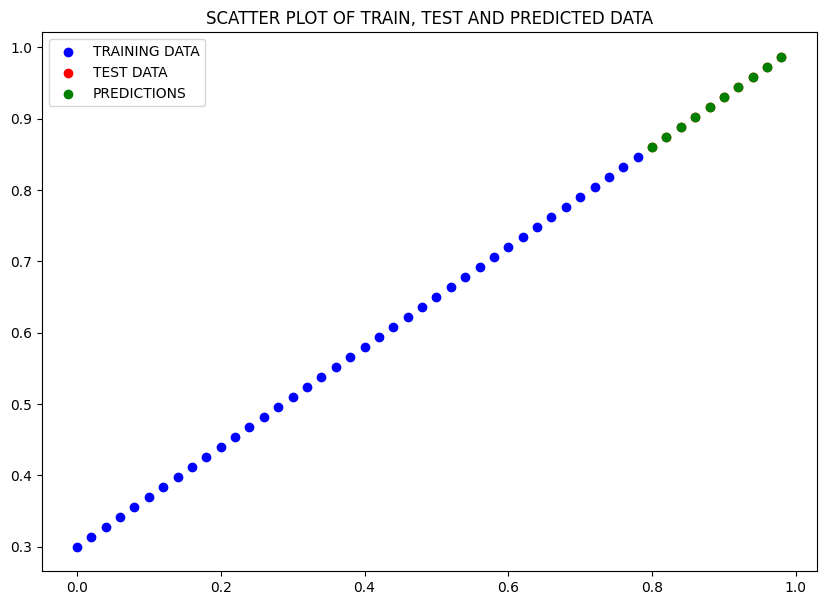

In [39]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [40]:
print(model_0.state_dict())
print(f"True weight: {weight}, True bias: {bias}")

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3009]))])
True weight: 0.7, True bias: 0.3


In [41]:
print(loss)

tensor(0.0003, grad_fn=<MeanBackward0>)


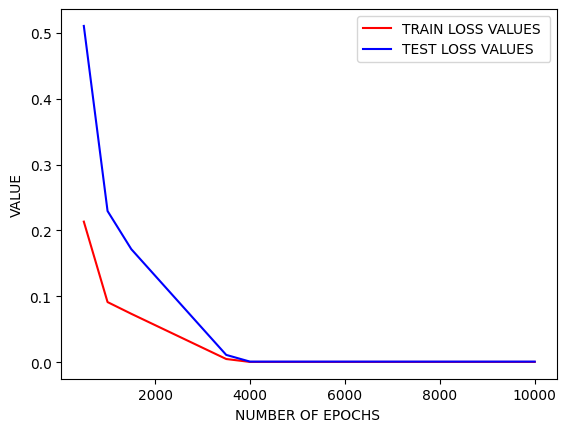

In [42]:
import numpy as np
with torch.no_grad():
    plt.plot(epoch_count , (loss_values) , label = "TRAIN LOSS VALUES " , c = "r")
    plt.plot(epoch_count , test_loss_value , label="TEST LOSS VALUES " , c="b")
    plt.legend()
    plt.xlabel("NUMBER OF EPOCHS ")
    plt.ylabel("VALUE")
    plt.show()

## SAVING A MODEL 
there are three main methods to save and load the model 
1. `torch.save()` - allows you to save a pytorch object in pickle format 
2. `torch.load()` - allows you to load a pytorch saved object 
3. `torch.nn.Module.load_state_dict()` - this allows you to load a models saved state dictionary 

In [43]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3009]))])

In [44]:
torch.save(model_0  , 'model_0.pkl')

In [45]:
from pathlib import Path 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

In [46]:
MODEL_NAME = "LinearRegression.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

WindowsPath('models/LinearRegression.pth')

In [47]:
torch.save(obj=model_0.state_dict() , f=MODEL_SAVE_PATH)

## LOADING OUR MODEL 
since we saved a state_dict rather than the entire model , we will create a new instance of our model and load the `state_dict()` into that 

In [48]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([2.8770])), ('bias', tensor([-0.4936]))])

In [49]:
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [50]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3009]))])

In [51]:
loaded_model_0.eval()
with torch.no_grad():
    loaded_predictions = loaded_model_0(X_test)
loaded_predictions

tensor([[0.8608],
        [0.8748],
        [0.8888],
        [0.9028],
        [0.9168],
        [0.9308],
        [0.9448],
        [0.9588],
        [0.9728],
        [0.9868]])

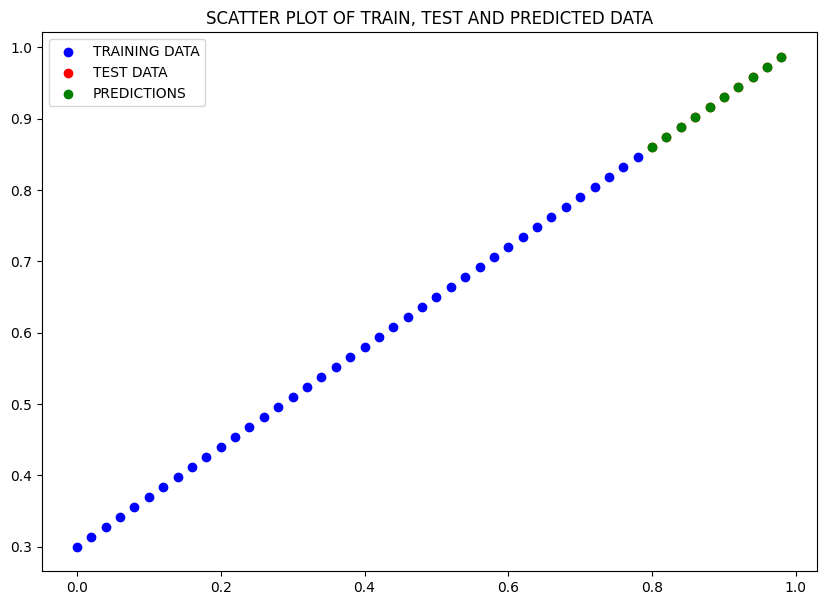

In [52]:
plot_predictions(predictions=loaded_predictions)

## IMPLEMENTING ANOTHER METHOD TO APPLY LINEAR REGRESSION 

### IMPORTING VARIOUS LIBRARIES 


In [53]:
import pandas as pd 
import numpy as np 
import torch 
from torch import nn 
import matplotlib.pyplot as plt 

### MAKING DATASET

In [54]:
weight2 = 0.8
bias2 = 0.68

start = 1 
end = 5
step = 0.01

X = torch.arange(start=start , end=end , step=step).unsqueeze(dim=1)
y = weight2*X+ bias2
X[:10] , y[:10]

(tensor([[1.0000],
         [1.0100],
         [1.0200],
         [1.0300],
         [1.0400],
         [1.0500],
         [1.0600],
         [1.0700],
         [1.0800],
         [1.0900]]),
 tensor([[1.4800],
         [1.4880],
         [1.4960],
         [1.5040],
         [1.5120],
         [1.5200],
         [1.5280],
         [1.5360],
         [1.5440],
         [1.5520]]))

In [55]:
ratio = 0.8 
train_split2 = int(ratio*(len(X)))
train_split2

320

In [56]:
X_train_2 = X[:train_split2]
y_train_2 = y[:train_split2]
X_test_2 = X[train_split2:]
y_test_2 = y[train_split2:]

X_train_2.shape , y_train_2.shape , X_test_2.shape , y_test_2.shape

(torch.Size([320, 1]),
 torch.Size([320, 1]),
 torch.Size([80, 1]),
 torch.Size([80, 1]))

In [68]:
def plotting_preds(predictions = None , train_label = X_train_2 , train_value = y_train_2 , test_label = X_test_2 , test_value = y_test_2):
    plt.plot(train_label ,train_value , c="r" , label = "training data " )
    plt.plot(test_label , test_value , c="b" , label = "train dataset")
    if predictions is not None:
        plt.plot(test_label , predictions , c="g" , label = "predicted dataset")
    plt.legend()
    plt.title("GRAPH OF TRAIN , TEST AND PREDICTED DATASET ")
    plt.show()

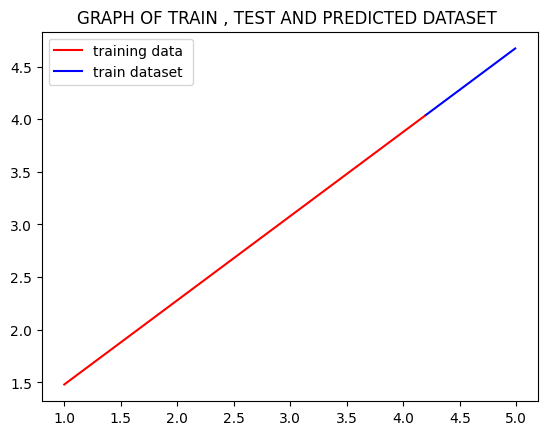

In [69]:
plotting_preds()

In [70]:
import torch
import torch.nn as nn

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [71]:
# Assuming LinearRegressionModelV2 is already defined
model_1 = LinearRegressionModelV2()

# Print the initial state of the model
print(model_1.state_dict())

# Set the seed again for optimizer to ensure reproducibility
torch.manual_seed(42)
loss_fn_2 = nn.L1Loss()
optimiser_2 = torch.optim.SGD(params=model_1.parameters(), lr=0.001)  # Increased learning rate
epochs = 10000

epoch_list = []
train_loss_list = []
test_loss_list = []

for epoch in range(epochs):
    model_1.train()
    pred_2 = model_1(X_train_2)
    loss_2 = loss_fn_2(pred_2, y_train_2)
    optimiser_2.zero_grad()
    loss_2.backward()
    optimiser_2.step()

    model_1.eval()
    with torch.no_grad():
        y_test_preds = model_1(X_test_2)
        loss_test = loss_fn_2(y_test_preds, y_test_2)

    if epoch % 1000 == 0:  # Logging more frequently
        print(f"EPOCH : {epoch} | TRAIN LOSS : {loss_2.item()} | TEST LOSS : {loss_test.item()} | MODEL PARAMETERS : {model_1.state_dict()}")
        epoch_list.append(epoch)
        train_loss_list.append(loss_2.item())
        test_loss_list.append(loss_test.item())

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
EPOCH : 0 | TRAIN LOSS : 0.0579853281378746 | TEST LOSS : 0.025861572474241257 | MODEL PARAMETERS : OrderedDict([('linear_layer.weight', tensor([[0.7619]])), ('linear_layer.bias', tensor([0.8290]))])
EPOCH : 1000 | TRAIN LOSS : 0.005927202291786671 | TEST LOSS : 0.000428938859840855 | MODEL PARAMETERS : OrderedDict([('linear_layer.weight', tensor([[0.7989]])), ('linear_layer.bias', tensor([0.6847]))])
EPOCH : 2000 | TRAIN LOSS : 0.005927202291786671 | TEST LOSS : 0.000428938859840855 | MODEL PARAMETERS : OrderedDict([('linear_layer.weight', tensor([[0.7989]])), ('linear_layer.bias', tensor([0.6847]))])
EPOCH : 3000 | TRAIN LOSS : 0.005927202291786671 | TEST LOSS : 0.000428938859840855 | MODEL PARAMETERS : OrderedDict([('linear_layer.weight', tensor([[0.7989]])), ('linear_layer.bias', tensor([0.6847]))])
EPOCH : 4000 | TRAIN LOSS : 0.005927202291786671 | TEST LOSS : 0.000428938859840855 |

In [61]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.0242]])),
             ('linear_layer.bias', tensor([0.0061]))])

In [72]:
weight2 , bias2

(0.8, 0.68)

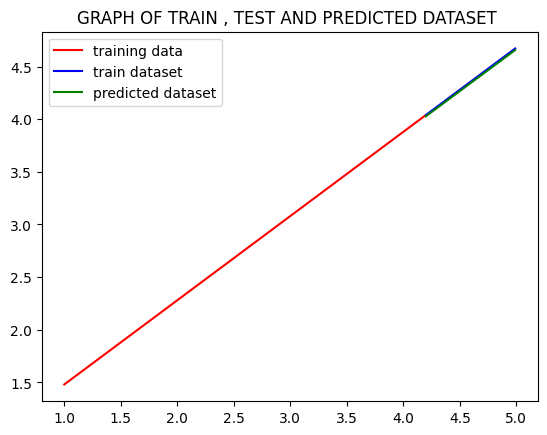

In [73]:
predictions_2 = model_1(X_test_2)
with torch.no_grad():
    plotting_preds(predictions=predictions_2)

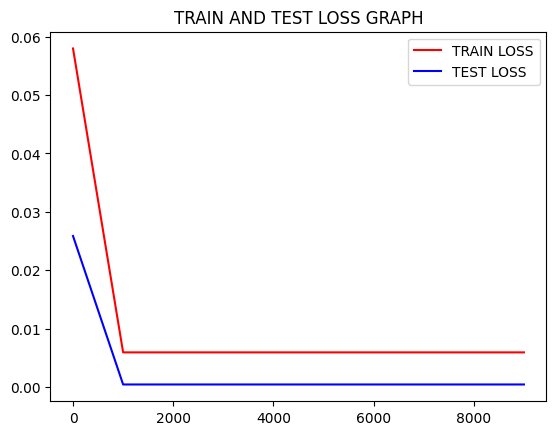

In [74]:
with torch.no_grad():
    plt.plot(epoch_list , train_loss_list , c="r" , label = "TRAIN LOSS")
    plt.plot(epoch_list , test_loss_list , c="b" , label = "TEST LOSS")
    plt.legend()
    plt.title("TRAIN AND TEST LOSS GRAPH")
    plt.show()

In [75]:
from pathlib import Path
MODEL_name = "LinearRegression2.pth"
MODEL_path = Path("models")

MODEL_save_path = MODEL_path / MODEL_name
MODEL_save_path

WindowsPath('models/LinearRegression2.pth')

In [76]:
import torch

In [77]:
torch.save(model_1 , MODEL_save_path)